In [77]:
%matplotlib inline


import matplotlib.backends.backend_pdf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import json
import os

# sns.set(style="white",context="paper", font="monospace")

if "images" not in os.listdir(os.getcwd()):
    os.mkdir("images")

# fetch data from json file
with open("sents_bilstm.json") as infile:
    json_obj = json.load(infile)

# Get outputs weights and convert them to float
out_weights = np.expand_dims(np.asarray([float(x) for x in json_obj['out_weight']]),axis=0)
    
sorted_keys = sorted(json_obj.keys())

# get tokens for random sentence and activation matrix
k = random.choice(sorted_keys)
tokens = json_obj[k]['tokens']
act_matrix = json_obj[k]['activation']

# order act_matrix for activation
def order_matrix_act(act_matrix):
#     get the transpose (400,n) -> list
    np_m = np.asarray(act_matrix).T.tolist()
#     sort the rows
    sorted_rows = sorted([(sum(x),i) for i,x in enumerate(np_m)],reverse=True)
    sortedM = np.asarray([np_m[idx] for x,idx in sorted_rows]).T
    new_indices = [idx for v,idx in sorted_rows]
    return sortedM, new_indices

sortedM, new_indices = order_matrix_act(act_matrix)
# order act_matrix for output weight

def order_matrix_weight(act_matrix,out_weights):
#     get the transpose (400,n) -> list
    np_m = np.asarray(act_matrix).T.tolist()
#     sort the output weights and get the new indices accordingly
    weights2list = out_weights.flatten().tolist()
    sorted_outW = sorted([(v,idx) for idx,v in enumerate(weights2list)],reverse=True)
    new_indices = [idx for v,idx in sorted_outW]
#     sort the rows acc
    sortedMW = np.asarray([np_m[idx] for x,idx in sorted_outW]).T
    return sortedMW, new_indices

sortedMW,new_indicesW = order_matrix_weight(act_matrix,out_weights)

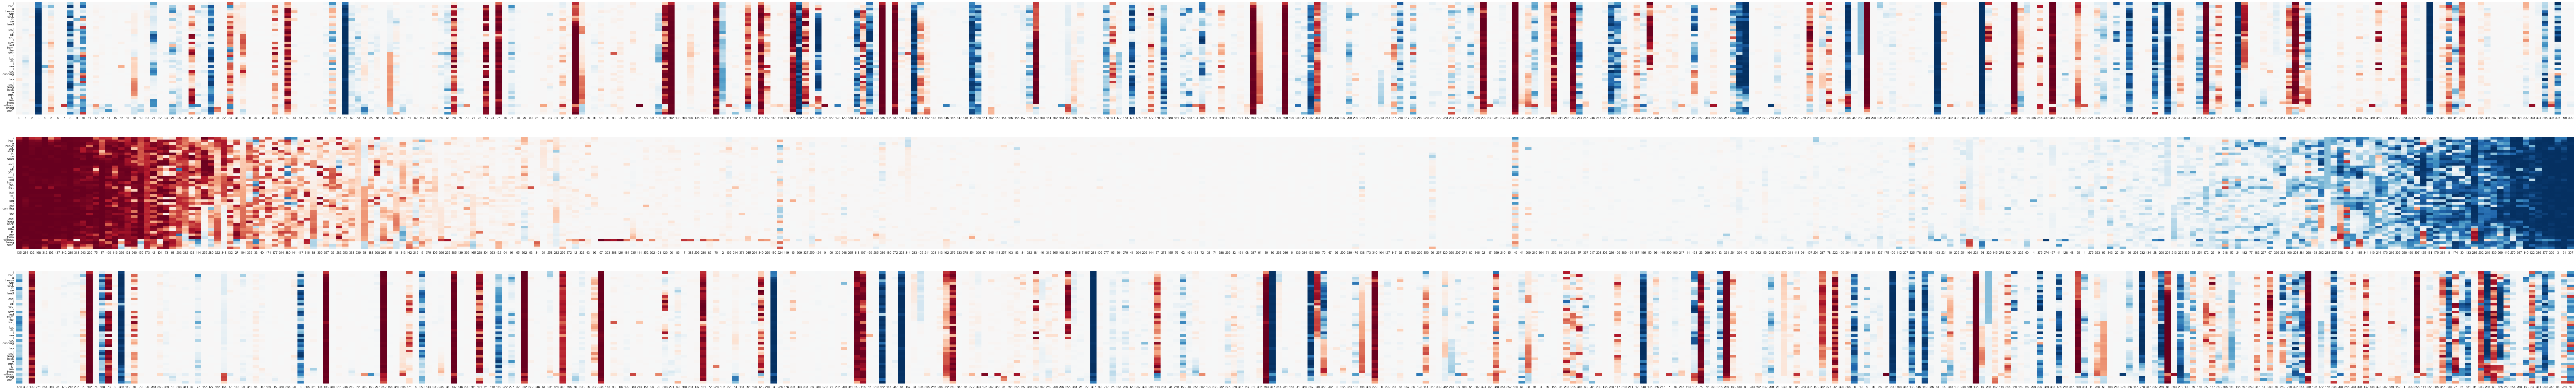

In [78]:
fig = plt.figure()
fig.set_size_inches(141,21)
ax = fig.add_subplot(311)

sns.heatmap(act_matrix, ax=ax, cbar=False, vmin=-1, vmax=1, cbar_ax= None, yticklabels=tokens)

ax2 = fig.add_subplot(312)

sns.heatmap(sortedM, ax=ax2, cbar=False, vmin=-1, vmax=1, cbar_ax= None, yticklabels=tokens, xticklabels=new_indices)

ax3 = fig.add_subplot(313)

sns.heatmap(sortedMW, ax=ax3, cbar=False, vmin=-1, vmax=1, cbar_ax= None, yticklabels=tokens, xticklabels=new_indicesW)

pdf = matplotlib.backends.backend_pdf.PdfPages("images/output.pdf")
pdf.savefig(fig)
pdf.close()